<a href="https://colab.research.google.com/github/rubengp39/StudentExperience-ResultsAI/blob/main/StudentExperience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install apyori
!pip install eli5
!pip install wordcloud

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=eea31a027885122d3db5852a6a1eab3a55594e57d50eefecfc260808a558b99b
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori
     |████████████████████████████████| 112kB 8.3MB/s 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from apyori import apriori
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from pandas import DataFrame
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import re
%matplotlib inline  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



In [4]:
df = pd.read_excel("encuestasv2.xlsx")

In [5]:
df.head(5)

,nºregistro,nºEncuesta,Modelo,Año_Estudio,Edicion,Titulacion,campus,curso,Asignatura,ÁreaConocimientoAsignatura,Nota media asignatura,Nota_discreta,Créditos,Profesor,SexoProf,EdadProf,CampusProf,Conocer,Explicar,Metodología,Feed_back,General,Documentacion,General Aprendizaje,Valoracion prof1,Valoracion prof2,Valoracion prof3,Programacion,Aporta Valor
0,13422.0,795.0,1.0,5.0,9.0,1.0,1.0,1.0,198,4.0,NaN,0,NaN,30,1.0,2.0,1.0,8.0,7.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13423.0,795.0,1.0,5.0,9.0,1.0,1.0,1.0,198,4.0,NaN,0,NaN,30,1.0,2.0,1.0,9.0,8.0,9.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13424.0,795.0,1.0,5.0,9.0,1.0,1.0,1.0,198,4.0,NaN,0,NaN,30,1.0,2.0,1.0,10.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13425.0,795.0,1.0,5.0,9.0,1.0,1.0,1.0,198,4.0,NaN,0,NaN,30,1.0,2.0,1.0,7.0,6.0,8.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13426.0,795.0,1.0,5.0,9.0,1.0,1.0,1.0,198,4.0,NaN,0,NaN,30,1.0,2.0,1.0,6.0,6.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(24437, 29)

In [7]:
#drop NaN notas
df = df.dropna(subset=["Conocer",'Explicar','Metodología','Feed_back','General','Nota media asignatura'])


In [8]:
df.isna().sum()


nºregistro                        0
nºEncuesta                        0
Modelo                            0
Año_Estudio                       0
Edicion                           0
Titulacion                        0
campus                            0
curso                             0
Asignatura                        0
ÁreaConocimientoAsignatura        0
Nota media asignatura             0
Nota_discreta                     0
Créditos                          0
Profesor                          0
SexoProf                          0
EdadProf                          0
CampusProf                        0
Conocer                           0
Explicar                          0
Metodología                       0
Feed_back                         0
General                           0
Documentacion                  8394
General Aprendizaje            8394
Valoracion prof1              10950
Valoracion prof2              10950
Valoracion prof3              10950
Programacion                

In [9]:
df.head()

,nºregistro,nºEncuesta,Modelo,Año_Estudio,Edicion,Titulacion,campus,curso,Asignatura,ÁreaConocimientoAsignatura,Nota media asignatura,Nota_discreta,Créditos,Profesor,SexoProf,EdadProf,CampusProf,Conocer,Explicar,Metodología,Feed_back,General,Documentacion,General Aprendizaje,Valoracion prof1,Valoracion prof2,Valoracion prof3,Programacion,Aporta Valor
285,13707.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,13708.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,5.0,2.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,13709.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,13710.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,13711.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,6.0,4.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Categorizar notas
bins = pd.IntervalIndex.from_tuples([(0, 5), (5, 8), (8, 11)], closed = 'left')
x = pd.cut(df["Nota media asignatura"].to_list(), bins)
x.categories = ["Suspenso", "Aprobado", "Sobresaliente"]
df["categoricalNota"] = x

In [11]:
#Categorizar Conocer
x = pd.cut(df["Conocer"].to_list(), bins)
x.categories = ["Detractor", "Passive", "Promotor"]
df["ConocerCat"] = x

In [12]:
#Categorizar Explicar
y = pd.cut(df["Explicar"].to_list(), bins)
y.categories = ["Detractor", "Passive", "Promotor"]
df["ExplicarCat"] = y

In [13]:
#Categorizar Metodología
y = pd.cut(df["Metodología"].to_list(), bins)
y.categories = ["Detractor", "Passive", "Promotor"]
df["MetodologiaCat"] = y

In [14]:
#Categorizar Feed_Back
y = pd.cut(df["Feed_back"].to_list(), bins)
y.categories = ["Detractor", "Passive", "Promotor"]
df["Feed_backCat"] = y

In [15]:
#Categorizar General

bins = pd.IntervalIndex.from_tuples([(0, 7), (7, 9), (9, 11)], closed = 'left')
x = pd.cut(df["General"].to_list(), bins)
x.categories = ["Detractor", "Passive", "Promotor"]
df["categorical"] = x

In [16]:
df.head()

,nºregistro,nºEncuesta,Modelo,Año_Estudio,Edicion,Titulacion,campus,curso,Asignatura,ÁreaConocimientoAsignatura,Nota media asignatura,Nota_discreta,Créditos,Profesor,SexoProf,EdadProf,CampusProf,Conocer,Explicar,Metodología,Feed_back,General,Documentacion,General Aprendizaje,Valoracion prof1,Valoracion prof2,Valoracion prof3,Programacion,Aporta Valor,categoricalNota,ConocerCat,ExplicarCat,MetodologiaCat,Feed_backCat,categorical
285,13707.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprobado,Promotor,Promotor,Promotor,Promotor,Promotor
286,13708.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,5.0,2.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprobado,Passive,Detractor,Passive,Passive,Detractor
287,13709.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprobado,Passive,Passive,Passive,Passive,Detractor
288,13710.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprobado,Passive,Passive,Passive,Passive,Detractor
289,13711.0,801.0,1.0,5.0,9.0,1.0,1.0,1.0,1,1.0,6.435088,6,7.0,73,3.0,0.0,0.0,6.0,4.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprobado,Passive,Detractor,Detractor,Detractor,Detractor


In [17]:
df.drop("Aporta Valor",axis=1, inplace=True)

In [18]:
df.drop("Programacion",axis=1, inplace=True)

In [19]:
df.drop("General Aprendizaje",axis=1, inplace=True)

In [20]:
df.drop("Documentacion",axis=1, inplace=True)

In [21]:
df.drop(df[df['Asignatura'] == "82-79"].index, inplace = True)
df.shape


(11359, 31)

In [22]:
df.drop(df[df['Profesor'] == "6-14"].index, inplace = True)
df.drop(df[df['Profesor'] == "33-61"].index, inplace = True)
df.drop(df[df['Profesor'] == "60-133"].index, inplace = True)
df.drop(df[df['Profesor'] == "90-85"].index, inplace = True)
df.drop(df[df['Profesor'] == 73].index, inplace = True)
df.drop(df[df['Profesor'] == 109].index, inplace = True)
df.drop(df[df['Profesor'] == 121].index, inplace = True)
df.drop(df[df['Profesor'] == 123].index, inplace = True)
df.drop(df[df['Profesor'] == 131].index, inplace = True)
#Dropeamos también los profesores que no tienen sexo, edad y campus
#No eran profesores como tal, sino entidades, empresas....

In [23]:
df.shape

(11056, 31)

In [24]:
newdf=df['Valoracion prof1'].notnull()
filtered_df = df[newdf]

In [25]:
filtered_df.shape

(409, 31)

In [26]:
filtered_df.head(5)

,nºregistro,nºEncuesta,Modelo,Año_Estudio,Edicion,Titulacion,campus,curso,Asignatura,ÁreaConocimientoAsignatura,Nota media asignatura,Nota_discreta,Créditos,Profesor,SexoProf,EdadProf,CampusProf,Conocer,Explicar,Metodología,Feed_back,General,Valoracion prof1,Valoracion prof2,Valoracion prof3,categoricalNota,ConocerCat,ExplicarCat,MetodologiaCat,Feed_backCat,categorical
17832,32113.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,9.0,9.0,9.0,4.0,8.0,9.0,6.0,7.0,Aprobado,Promotor,Promotor,Promotor,Detractor,Passive
17833,32114.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,9.0,8.0,6.0,6.0,7.0,5.0,5.0,4.0,Aprobado,Promotor,Promotor,Passive,Passive,Passive
17834,32115.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,10.0,8.0,8.0,7.0,7.0,10.0,7.0,5.0,Aprobado,Promotor,Promotor,Promotor,Passive,Passive
17835,32116.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,8.0,8.0,9.0,4.0,7.0,10.0,5.0,6.0,Aprobado,Promotor,Promotor,Promotor,Detractor,Passive
17836,32117.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,9.0,8.0,7.0,8.0,8.0,10.0,7.0,6.0,Aprobado,Promotor,Promotor,Passive,Promotor,Passive


In [27]:
filtered_df1 = filtered_df.drop(["Valoracion prof2","Valoracion prof3"],axis=1)

In [28]:
filtered_df2 = filtered_df.drop(["Valoracion prof1","Valoracion prof3"],axis=1)
#Eliminamos los mantener y mejorar para no duplicar los comentarios en el caso de hacer NLP

In [29]:
filtered_df3 = filtered_df.drop(["Valoracion prof1","Valoracion prof2"],axis=1)
#Eliminamos los mantener y mejorar para no duplicar los comentarios en el caso de hacer NLP

In [30]:
filtered_dfT = filtered_df.drop(["Valoracion prof1","Valoracion prof2","Valoracion prof3"],axis=1)

In [31]:
filtered_df1.head(5)


,nºregistro,nºEncuesta,Modelo,Año_Estudio,Edicion,Titulacion,campus,curso,Asignatura,ÁreaConocimientoAsignatura,Nota media asignatura,Nota_discreta,Créditos,Profesor,SexoProf,EdadProf,CampusProf,Conocer,Explicar,Metodología,Feed_back,General,Valoracion prof1,categoricalNota,ConocerCat,ExplicarCat,MetodologiaCat,Feed_backCat,categorical
17832,32113.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,9.0,9.0,9.0,4.0,8.0,9.0,Aprobado,Promotor,Promotor,Promotor,Detractor,Passive
17833,32114.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,9.0,8.0,6.0,6.0,7.0,5.0,Aprobado,Promotor,Promotor,Passive,Passive,Passive
17834,32115.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,10.0,8.0,8.0,7.0,7.0,10.0,Aprobado,Promotor,Promotor,Promotor,Passive,Passive
17835,32116.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,8.0,8.0,9.0,4.0,7.0,10.0,Aprobado,Promotor,Promotor,Promotor,Detractor,Passive
17836,32117.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129-150-37,3.0,0.0,0.0,9.0,8.0,7.0,8.0,8.0,10.0,Aprobado,Promotor,Promotor,Passive,Promotor,Passive


In [32]:
filtered_df1['Profesor'] =filtered_df1["Profesor"].str.split("-",expand= True)[0]
filtered_df1['General'] = filtered_df1['Valoracion prof1']
filtered_df1.drop(["Valoracion prof1"],axis=1,inplace=True)


In [33]:
filtered_df2['Profesor'] =filtered_df2["Profesor"].str.split("-",expand= True)[1]
filtered_df2['General'] = filtered_df2['Valoracion prof2']
filtered_df2.drop(["Valoracion prof2"],axis=1,inplace=True)

In [34]:
filtered_df3['Profesor'] =filtered_df3["Profesor"].str.split("-",expand= True)[2]
filtered_df3['General'] = filtered_df3['Valoracion prof3']
filtered_df3.drop(["Valoracion prof3"],axis=1,inplace=True)

In [35]:
dfv2 = pd.concat([filtered_df1,filtered_df2,filtered_df3])

In [36]:
dfv2.shape

(1227, 28)

In [37]:
df.drop(df[df['Valoracion prof1'].notnull()].index, inplace = True)
df.shape
dfv3 = pd.concat([df, dfv2])

dfv3.drop(['Valoracion prof1'], axis = 1, inplace = True)

dfv3.drop(['Valoracion prof2'], axis = 1,inplace = True)

dfv3.drop(['Valoracion prof3'], axis = 1, inplace= True)


In [38]:
dfv3.shape
#tiene sentido: filtrado en excel 23645 filas. 
#Si a eso le sumamos 409*2, es decir, sumarle a las 409 originales los duplicados df2 y df3, 
#dan las 24463

(11874, 28)

In [39]:
Prueba = dfv3.loc[:, 'nºregistro'] == 32113
df_prueba = dfv3.loc[Prueba]
df_prueba.head()
#Probamos que ha triplicado las encuestas, con una nota para cada profesor
#Y con solo una fila de comentarios
#Vemos también que sexo,edad y campus están con códigos de error porque venían del triple prof original
#en los códigos siguientes soluciono mal el problema, pero se soluciona

,nºregistro,nºEncuesta,Modelo,Año_Estudio,Edicion,Titulacion,campus,curso,Asignatura,ÁreaConocimientoAsignatura,Nota media asignatura,Nota_discreta,Créditos,Profesor,SexoProf,EdadProf,CampusProf,Conocer,Explicar,Metodología,Feed_back,General,categoricalNota,ConocerCat,ExplicarCat,MetodologiaCat,Feed_backCat,categorical
17832,32113.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,129,3.0,0.0,0.0,9.0,9.0,9.0,4.0,9.0,Aprobado,Promotor,Promotor,Promotor,Detractor,Passive
17832,32113.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,150,3.0,0.0,0.0,9.0,9.0,9.0,4.0,6.0,Aprobado,Promotor,Promotor,Promotor,Detractor,Passive
17832,32113.0,1714.0,2.0,10.0,19.0,1.0,1.0,1.0,257,1.0,7.5,8,12.0,37,3.0,0.0,0.0,9.0,9.0,9.0,4.0,7.0,Aprobado,Promotor,Promotor,Promotor,Detractor,Passive


In [40]:
dfv3.loc[dfv3.Profesor=="129",'SexoProf']=1
dfv3.loc[dfv3.Profesor=="129",'EdadProf']=2
dfv3.loc[dfv3.Profesor=="129",'CampusProf']=2
#Actualizamos los valores de sexo, edad y campus de cada profesor
#Habrá maneras mucho mejores que esta, de momento es para comprobar más fácil con el database
#Comprobado que está bien al final, podemos revisar cómo hacerlo más bonito
#Imagino que habrá al menos una forma de hacer una sola línea de código por cada profesor

In [41]:
dfv3.loc[dfv3.Profesor=="150",'SexoProf']=1
dfv3.loc[dfv3.Profesor=="150",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="150",'CampusProf']=1

dfv3.loc[dfv3.Profesor=="37",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="37",'EdadProf']=2
dfv3.loc[dfv3.Profesor=="37",'CampusProf']=1


dfv3.loc[dfv3.Profesor=="14",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="14",'EdadProf']=3
dfv3.loc[dfv3.Profesor=="14",'CampusProf']=1

dfv3.loc[dfv3.Profesor=="6",'SexoProf']=1
dfv3.loc[dfv3.Profesor=="6",'EdadProf']=3
dfv3.loc[dfv3.Profesor=="6",'CampusProf']=1

dfv3.loc[dfv3.Profesor=="60",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="60",'EdadProf']=3
dfv3.loc[dfv3.Profesor=="60",'CampusProf']=1

dfv3.loc[dfv3.Profesor=="159",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="159",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="159",'CampusProf']=5

dfv3.loc[dfv3.Profesor=="138",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="138",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="138",'CampusProf']=5

dfv3.loc[dfv3.Profesor=="90",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="90",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="90",'CampusProf']=1

dfv3.loc[dfv3.Profesor=="43",'SexoProf']=1
dfv3.loc[dfv3.Profesor=="43",'EdadProf']=2
dfv3.loc[dfv3.Profesor=="43",'CampusProf']=5

dfv3.loc[dfv3.Profesor=="154",'SexoProf']=1
dfv3.loc[dfv3.Profesor=="154",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="154",'CampusProf']=5

dfv3.loc[dfv3.Profesor=="22",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="22",'EdadProf']=2
dfv3.loc[dfv3.Profesor=="22",'CampusProf']=2

dfv3.loc[dfv3.Profesor=="162",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="162",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="162",'CampusProf']=5

dfv3.loc[dfv3.Profesor=="34",'SexoProf']=1
dfv3.loc[dfv3.Profesor=="34",'EdadProf']=3
dfv3.loc[dfv3.Profesor=="34",'CampusProf']=2

dfv3.loc[dfv3.Profesor=="144",'SexoProf']=1
dfv3.loc[dfv3.Profesor=="144",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="144",'CampusProf']=2

dfv3.loc[dfv3.Profesor=="130",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="130",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="130",'CampusProf']=2

dfv3.loc[dfv3.Profesor=="68",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="68",'EdadProf']=3
dfv3.loc[dfv3.Profesor=="68",'CampusProf']=1

dfv3.loc[dfv3.Profesor=="161",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="161",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="161",'CampusProf']=1

dfv3.loc[dfv3.Profesor=="89",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="89",'EdadProf']=1
dfv3.loc[dfv3.Profesor=="89",'CampusProf']=1

dfv3.loc[dfv3.Profesor=="160",'SexoProf']=2
dfv3.loc[dfv3.Profesor=="160",'EdadProf']=2
dfv3.loc[dfv3.Profesor=="160",'CampusProf']=2

dfv3.loc[dfv3.Profesor=="29",'SexoProf']=1
dfv3.loc[dfv3.Profesor=="29",'EdadProf']=2
dfv3.loc[dfv3.Profesor=="29",'CampusProf']=2

In [42]:
print (dfv3['SexoProf'].value_counts())
print (dfv3['EdadProf'].value_counts())
print (dfv3['CampusProf'].value_counts())
#Comprobamos que todos los valores de sexo, edad y campus son correctos

1.0    6698
2.0    5176
Name: SexoProf, dtype: int64
3.0    4274
2.0    3946
1.0    3654
Name: EdadProf, dtype: int64
1.0    8175
2.0    3111
5.0     588
Name: CampusProf, dtype: int64


In [43]:
dfv3.isna().sum()
#Efectivamente, había NA en algunas filas.


nºregistro                    0
nºEncuesta                    0
Modelo                        0
Año_Estudio                   0
Edicion                       0
Titulacion                    0
campus                        0
curso                         0
Asignatura                    0
ÁreaConocimientoAsignatura    0
Nota media asignatura         0
Nota_discreta                 0
Créditos                      0
Profesor                      0
SexoProf                      0
EdadProf                      0
CampusProf                    0
Conocer                       0
Explicar                      0
Metodología                   0
Feed_back                     0
General                       0
categoricalNota               0
ConocerCat                    0
ExplicarCat                   0
MetodologiaCat                0
Feed_backCat                  0
categorical                   0
dtype: int64

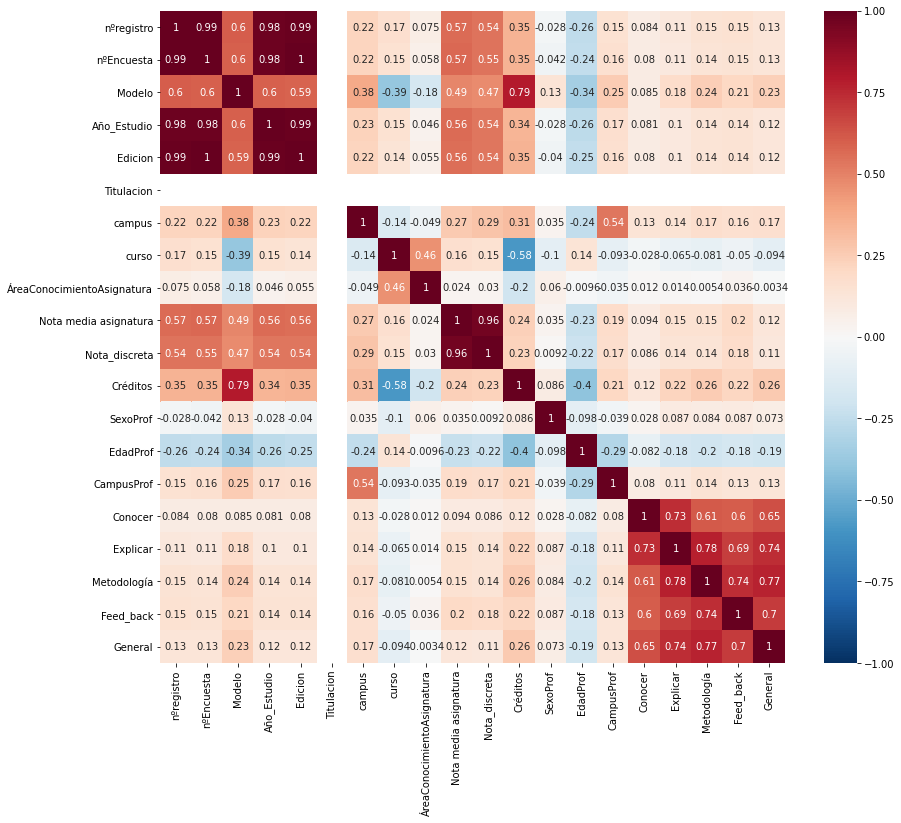

In [44]:
plt.figure(figsize=(14, 12))
crr = dfv3.corr()
heatmap = sns.heatmap(crr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

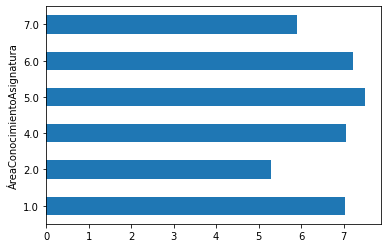

In [45]:
dfv3.groupby(['ÁreaConocimientoAsignatura'])

dfv3.groupby(['ÁreaConocimientoAsignatura'])['General']

dfv3.groupby(['ÁreaConocimientoAsignatura'])['General'].mean()

dfv3.groupby(['ÁreaConocimientoAsignatura'])['General'].mean().plot(kind='barh')



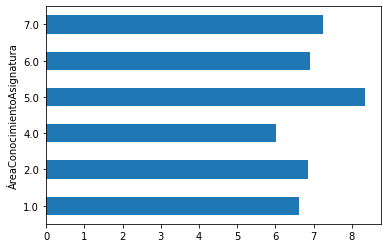

In [46]:
dfv3.groupby(['ÁreaConocimientoAsignatura'])

dfv3.groupby(['ÁreaConocimientoAsignatura'])['Nota media asignatura']

dfv3.groupby(['ÁreaConocimientoAsignatura'])['Nota media asignatura'].mean()

dfv3.groupby(['ÁreaConocimientoAsignatura'])['Nota media asignatura'].mean().plot(kind='barh')

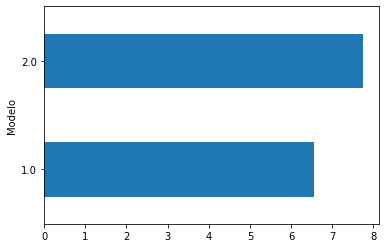

In [47]:
dfv3.groupby(['Modelo'])

dfv3.groupby(['Modelo'])['General']

dfv3.groupby(['Modelo'])['General'].mean()

dfv3.groupby(['Modelo'])['General'].mean().plot(kind='barh')

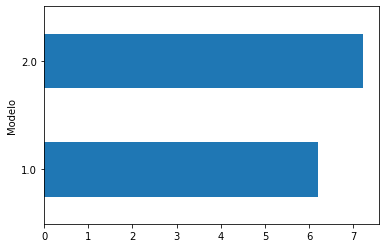

In [48]:
dfv3.groupby(['Modelo'])

dfv3.groupby(['Modelo'])['Nota media asignatura']

dfv3.groupby(['Modelo'])['Nota media asignatura'].mean()

dfv3.groupby(['Modelo'])['Nota media asignatura'].mean().plot(kind='barh')

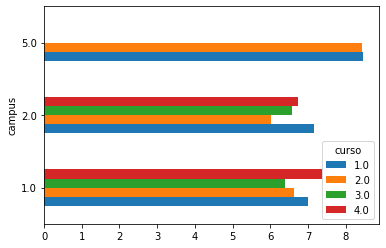

In [49]:
dfv3.groupby(['campus', 'curso'])['General'].mean().unstack().plot(kind='barh')


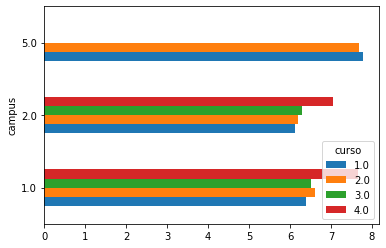

In [50]:
dfv3.groupby(['campus', 'curso'])['Nota media asignatura'].mean().unstack().plot(kind='barh')


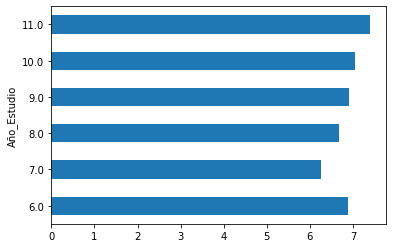

In [51]:
dfv3.groupby(['Año_Estudio'])

dfv3.groupby(['Año_Estudio'])['General']

dfv3.groupby(['Año_Estudio'])['General'].mean()

dfv3.groupby(['Año_Estudio'])['General'].mean().plot(kind='barh')

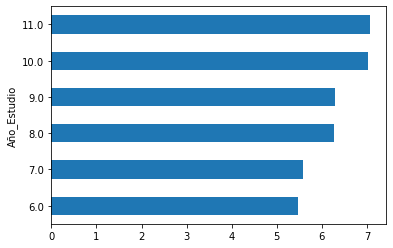

In [52]:
dfv3.groupby(['Año_Estudio'])

dfv3.groupby(['Año_Estudio'])['Nota media asignatura']

dfv3.groupby(['Año_Estudio'])['Nota media asignatura'].mean()

dfv3.groupby(['Año_Estudio'])['Nota media asignatura'].mean().plot(kind='barh')

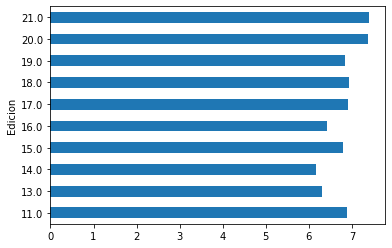

In [53]:
dfv3.groupby(['Edicion'])

dfv3.groupby(['Edicion'])['General']

dfv3.groupby(['Edicion'])['General'].mean()

dfv3.groupby(['Edicion'])['General'].mean().plot(kind='barh')

#Se mejoró en confinamiento, o por lo menos no ha ido a peor

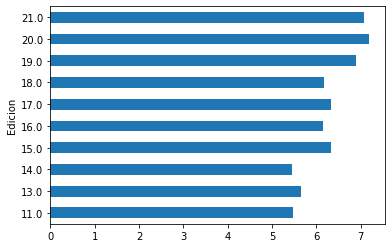

In [54]:
dfv3.groupby(['Edicion'])

dfv3.groupby(['Edicion'])['Nota media asignatura']

dfv3.groupby(['Edicion'])['Nota media asignatura'].mean()

dfv3.groupby(['Edicion'])['Nota media asignatura'].mean().plot(kind='barh')



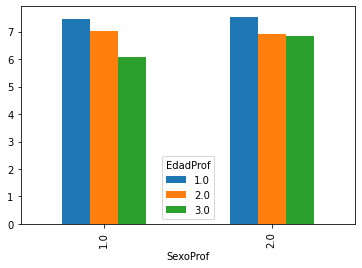

In [55]:
dfv3.groupby(['SexoProf', 'EdadProf'])['General'].mean().unstack().plot(kind='bar')

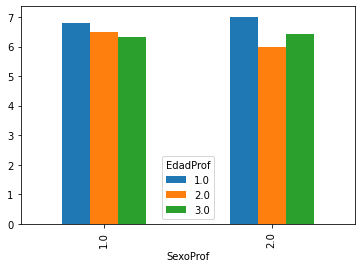

In [56]:
dfv3.groupby(['SexoProf', 'EdadProf'])['Nota media asignatura'].mean().unstack().plot(kind='bar')

In [57]:
fig = px.histogram(dfv3, x="General")
fig.update_layout(
    xaxis_title="Satisfacción")
fig.show()

In [58]:
fig = px.histogram(dfv3, x="Nota media asignatura")
fig.update_layout(
    xaxis_title="Nota media")
fig.show()

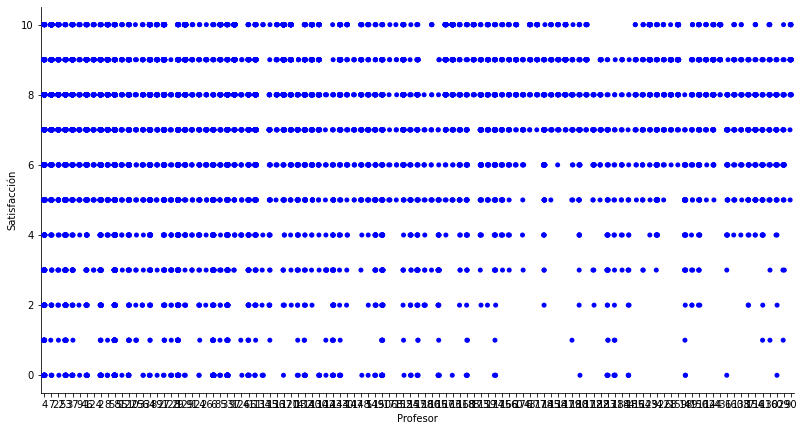

In [59]:
ax = sns.catplot(x='Profesor', y='General',data=dfv3, color='blue')
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax.set(xlabel='Profesor', ylabel='Satisfacción')
plt.show()

#Nuevos profes que entran, pocas malas notas

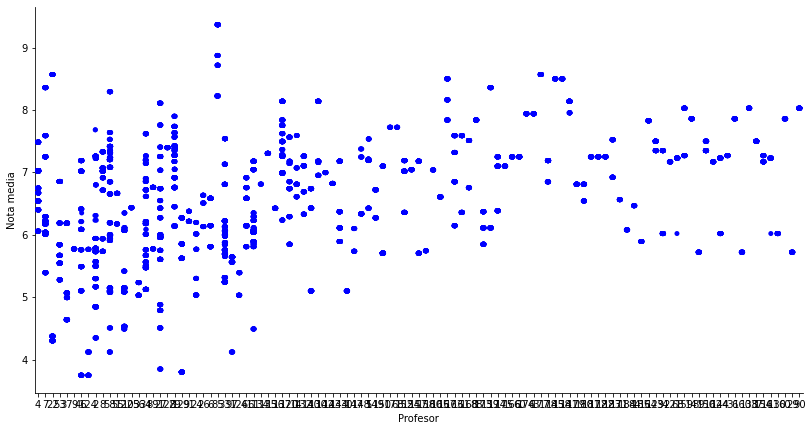

In [60]:
ax = sns.catplot(x='Profesor', y='Nota media asignatura',data=dfv3, color='blue')
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax.set(xlabel='Profesor', ylabel='Nota media')
plt.show()

In [61]:
#Empezando el modelo regresión: Features prediciendo General

In [62]:
dfv4= dfv3[['Conocer','Explicar','Metodología','Feed_back','General']]

In [63]:
general = dfv4['General']
features = dfv4[['Conocer','Explicar','Metodología','Feed_back']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    general, 
                                                    test_size = 0.2, 
                                                    random_state = 52)

# Show the results of the split
print("Training tiene {} datos.".format(X_train.shape[0]))
print("Testing tiene {} datos.".format(X_test.shape[0]))

Training tiene 9499 datos.
Testing tiene 2375 datos.


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear RMSE: {}".format(rmse))
accuracy = model.score(X_test,y_test)
print("Accuracy Linear: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")


model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model2.score(X_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model_ridge.score(X_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")



Linear RMSE: 1.336863457136258
Accuracy Linear: 0.673473235110231
R2 Linear: 0.673473235110231

Lasso RMSE: 1.431945031981111
Accuracy Lasso: 0.6253744656723079
R2 Lasso: 0.6253744656723079

Ridge RMSE: 1.3368630119857983
Accuracy Ridge: 0.673473452564773
R2 Ridge: 0.673473452564773



In [66]:
my_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)
perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1518 ± 0.0096,Explicar
0.0940 ± 0.0169,Conocer
0.0848 ± 0.0165,Metodología
0.0778 ± 0.0148,Feed_back


In [67]:
dfv4= dfv3[['Conocer','Explicar','Metodología','Feed_back','Nota_discreta']]

In [68]:
Notas = dfv4['Nota_discreta']
features_N = dfv4[['Conocer','Explicar','Metodología','Feed_back']]

In [69]:
dfv4.head()

,Conocer,Explicar,Metodología,Feed_back,Nota_discreta
3335,9.0,9.0,2.0,3.0,7
3336,8.0,7.0,6.0,7.0,7
3337,7.0,8.0,3.0,3.0,7
3338,8.0,9.0,7.0,7.0,7
3339,10.0,9.0,8.0,7.0,7


In [70]:
X_train, X_test, y_train, y_test = train_test_split(features_N, 
                                                    Notas, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

# Show the results of the split
print("Training tiene {} datos.".format(X_train.shape[0]))
print("Testing tiene {} datos.".format(X_test.shape[0]))

Training tiene 9499 datos.
Testing tiene 2375 datos.


In [71]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear RMSE: {}".format(rmse))
accuracy = model.score(X_test,y_test)
print("Accuracy Linear: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")


model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model2.score(X_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model_ridge.score(X_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")

Linear RMSE: 0.9747715387195102
Accuracy Linear: 0.030473138618708373
R2 Linear: 0.030473138618708373

Lasso RMSE: 0.9908077886411825
Accuracy Lasso: -0.0016891953651261282
R2 Lasso: -0.0016891953651261282

Ridge RMSE: 0.9747714302339388
Accuracy Ridge: 0.03047335442244392
R2 Ridge: 0.03047335442244392



Llegamos a la conclusión de que no hay relación directa con la nota discreta.


Empieza Decission Trees


DT General

In [72]:
drop_dfv3 = dfv3.drop(['General','categoricalNota','ConocerCat','ExplicarCat','MetodologiaCat','Feed_backCat','categorical'],1)
label = dfv3.General
data_train, data_test, label_train, label_test = train_test_split(drop_dfv3, label, test_size = 0.2, random_state = 100)

In [73]:
# Definir un clasificador
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Entrenar el clasificador con el dataset de train
dt2.fit(data_train, label_train)

# Evaluar en train
dt2_score_train = dt2.score(data_train, label_train)
# Evaluar en test
dt2_score_test = dt2.score(data_test, label_test)



In [74]:
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
dt1_score_test = dt1.score(data_test, label_test)

In [75]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.3531950731655964   0.3528421052631579
max                     1.0  0.40421052631578946


[Text(613.8000000000001, 679.5, 'Explicar <= 8.5\ngini = 0.861\nsamples = 9499\nvalue = [240, 125, 223, 335, 373, 833, 1134, 1698, 1904, 1654\n980]'),
 Text(306.90000000000003, 407.69999999999993, 'Metodología <= 5.5\ngini = 0.85\nsamples = 6581\nvalue = [231, 118, 215, 321, 360, 789, 1047, 1497, 1392, 491\n120]'),
 Text(153.45000000000002, 135.89999999999998, 'gini = 0.873\nsamples = 2422\nvalue = [218, 112, 196, 281, 307, 513, 343, 274, 128, 35\n15]'),
 Text(460.35, 135.89999999999998, 'gini = 0.775\nsamples = 4159\nvalue = [13, 6, 19, 40, 53, 276, 704, 1223, 1264, 456, 105]'),
 Text(920.7, 407.69999999999993, 'Feed_back <= 9.5\ngini = 0.718\nsamples = 2918\nvalue = [9, 7, 8, 14, 13, 44, 87, 201, 512, 1163, 860]'),
 Text(767.2500000000001, 135.89999999999998, 'gini = 0.695\nsamples = 2111\nvalue = [5, 7, 8, 13, 11, 36, 85, 187, 459, 1009, 291]'),
 Text(1074.15, 135.89999999999998, 'gini = 0.462\nsamples = 807\nvalue = [4, 0, 0, 1, 2, 8, 2, 14, 53, 154, 569]')]

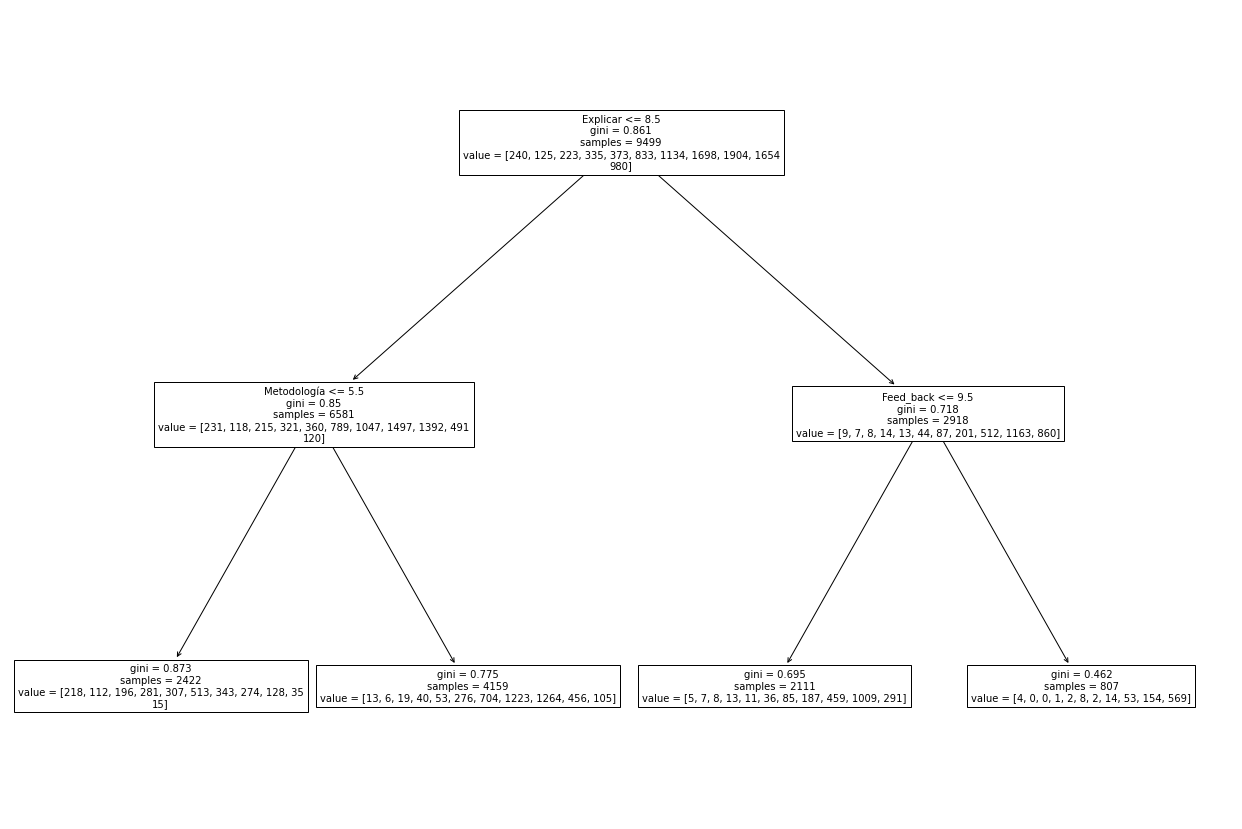

In [76]:
tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=data_train.columns)

plt.figure(figsize=(22,15))
tree.plot_tree(dt2,feature_names=data_train.columns,fontsize=10)

#En el grupo 1-explicar<8,5 metodología <5,5, mayoría detractores 65%aprox
#En el grupo 2-explicar<8,5 metodología >5,5, mayoría neutros, 65% aprox
#En el grupo 3-explicar>8,5 feedback<9,5, mayoría promotores, 60% aprox
#En el grupo 4, explicar>8,5 feedback>9,5, mayoría promotores, 89% aprox

#Un profesor que explique no demasiado bien (<8,5) como además tenga mala metodología, tendrá detractores
#Si explica no demasiado bien, pero al menos buena metodología, neutros
#Si esplica bien y no da feedback excelente, tiene promotores, con dudas a no ser que mejoremos modelo
#Si explica bien y da un feedback perfecto, tendrá "siempre" promotores

#Probamos con un arbol de 5 de profunidad, que tiene algo mejor score, y da alguna idea curiosa en las ramificaciones
#Empieza a aparecer como importante conocer, la asignatura y el modelo/nºregistro


In [77]:
# Definir un clasificador
dt2 = tree.DecisionTreeClassifier(random_state=800, max_depth=5)

# Entrenar el clasificador con el dataset de train
dt2.fit(data_train, label_train)

# Evaluar en train
dt2_score_train = dt2.score(data_train, label_train)
# Evaluar en test
dt2_score_test = dt2.score(data_test, label_test)

In [78]:
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
dt1_score_test = dt1.score(data_test, label_test)

In [79]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(5, dt2_score_train, dt2_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
5        0.4552058111380145  0.44505263157894737
max                     1.0   0.4025263157894737


[Text(1395.0, 2491.5, 'Explicar <= 8.5\ngini = 0.861\nsamples = 9499\nvalue = [240, 125, 223, 335, 373, 833, 1134, 1698, 1904, 1654\n980]'),
 Text(697.5, 2038.5, 'Metodología <= 5.5\ngini = 0.85\nsamples = 6581\nvalue = [231, 118, 215, 321, 360, 789, 1047, 1497, 1392, 491\n120]'),
 Text(348.75, 1585.5, 'Metodología <= 0.5\ngini = 0.873\nsamples = 2422\nvalue = [218, 112, 196, 281, 307, 513, 343, 274, 128, 35\n15]'),
 Text(174.375, 1132.5, 'Feed_back <= 0.5\ngini = 0.663\nsamples = 257\nvalue = [142, 22, 21, 25, 16, 16, 4, 6, 3, 1, 1]'),
 Text(87.1875, 679.5, 'Explicar <= 0.5\ngini = 0.359\nsamples = 128\nvalue = [102, 3, 5, 5, 5, 4, 2, 1, 1, 0, 0]'),
 Text(43.59375, 226.5, 'gini = 0.219\nsamples = 102\nvalue = [90, 1, 1, 1, 3, 3, 1, 1, 1, 0, 0]'),
 Text(130.78125, 226.5, 'gini = 0.725\nsamples = 26\nvalue = [12, 2, 4, 4, 2, 1, 1, 0, 0, 0, 0]'),
 Text(261.5625, 679.5, 'Nota media asignatura <= 5.147\ngini = 0.825\nsamples = 129\nvalue = [40, 19, 16, 20, 11, 12, 2, 5, 2, 1, 1]'),
 Text(2

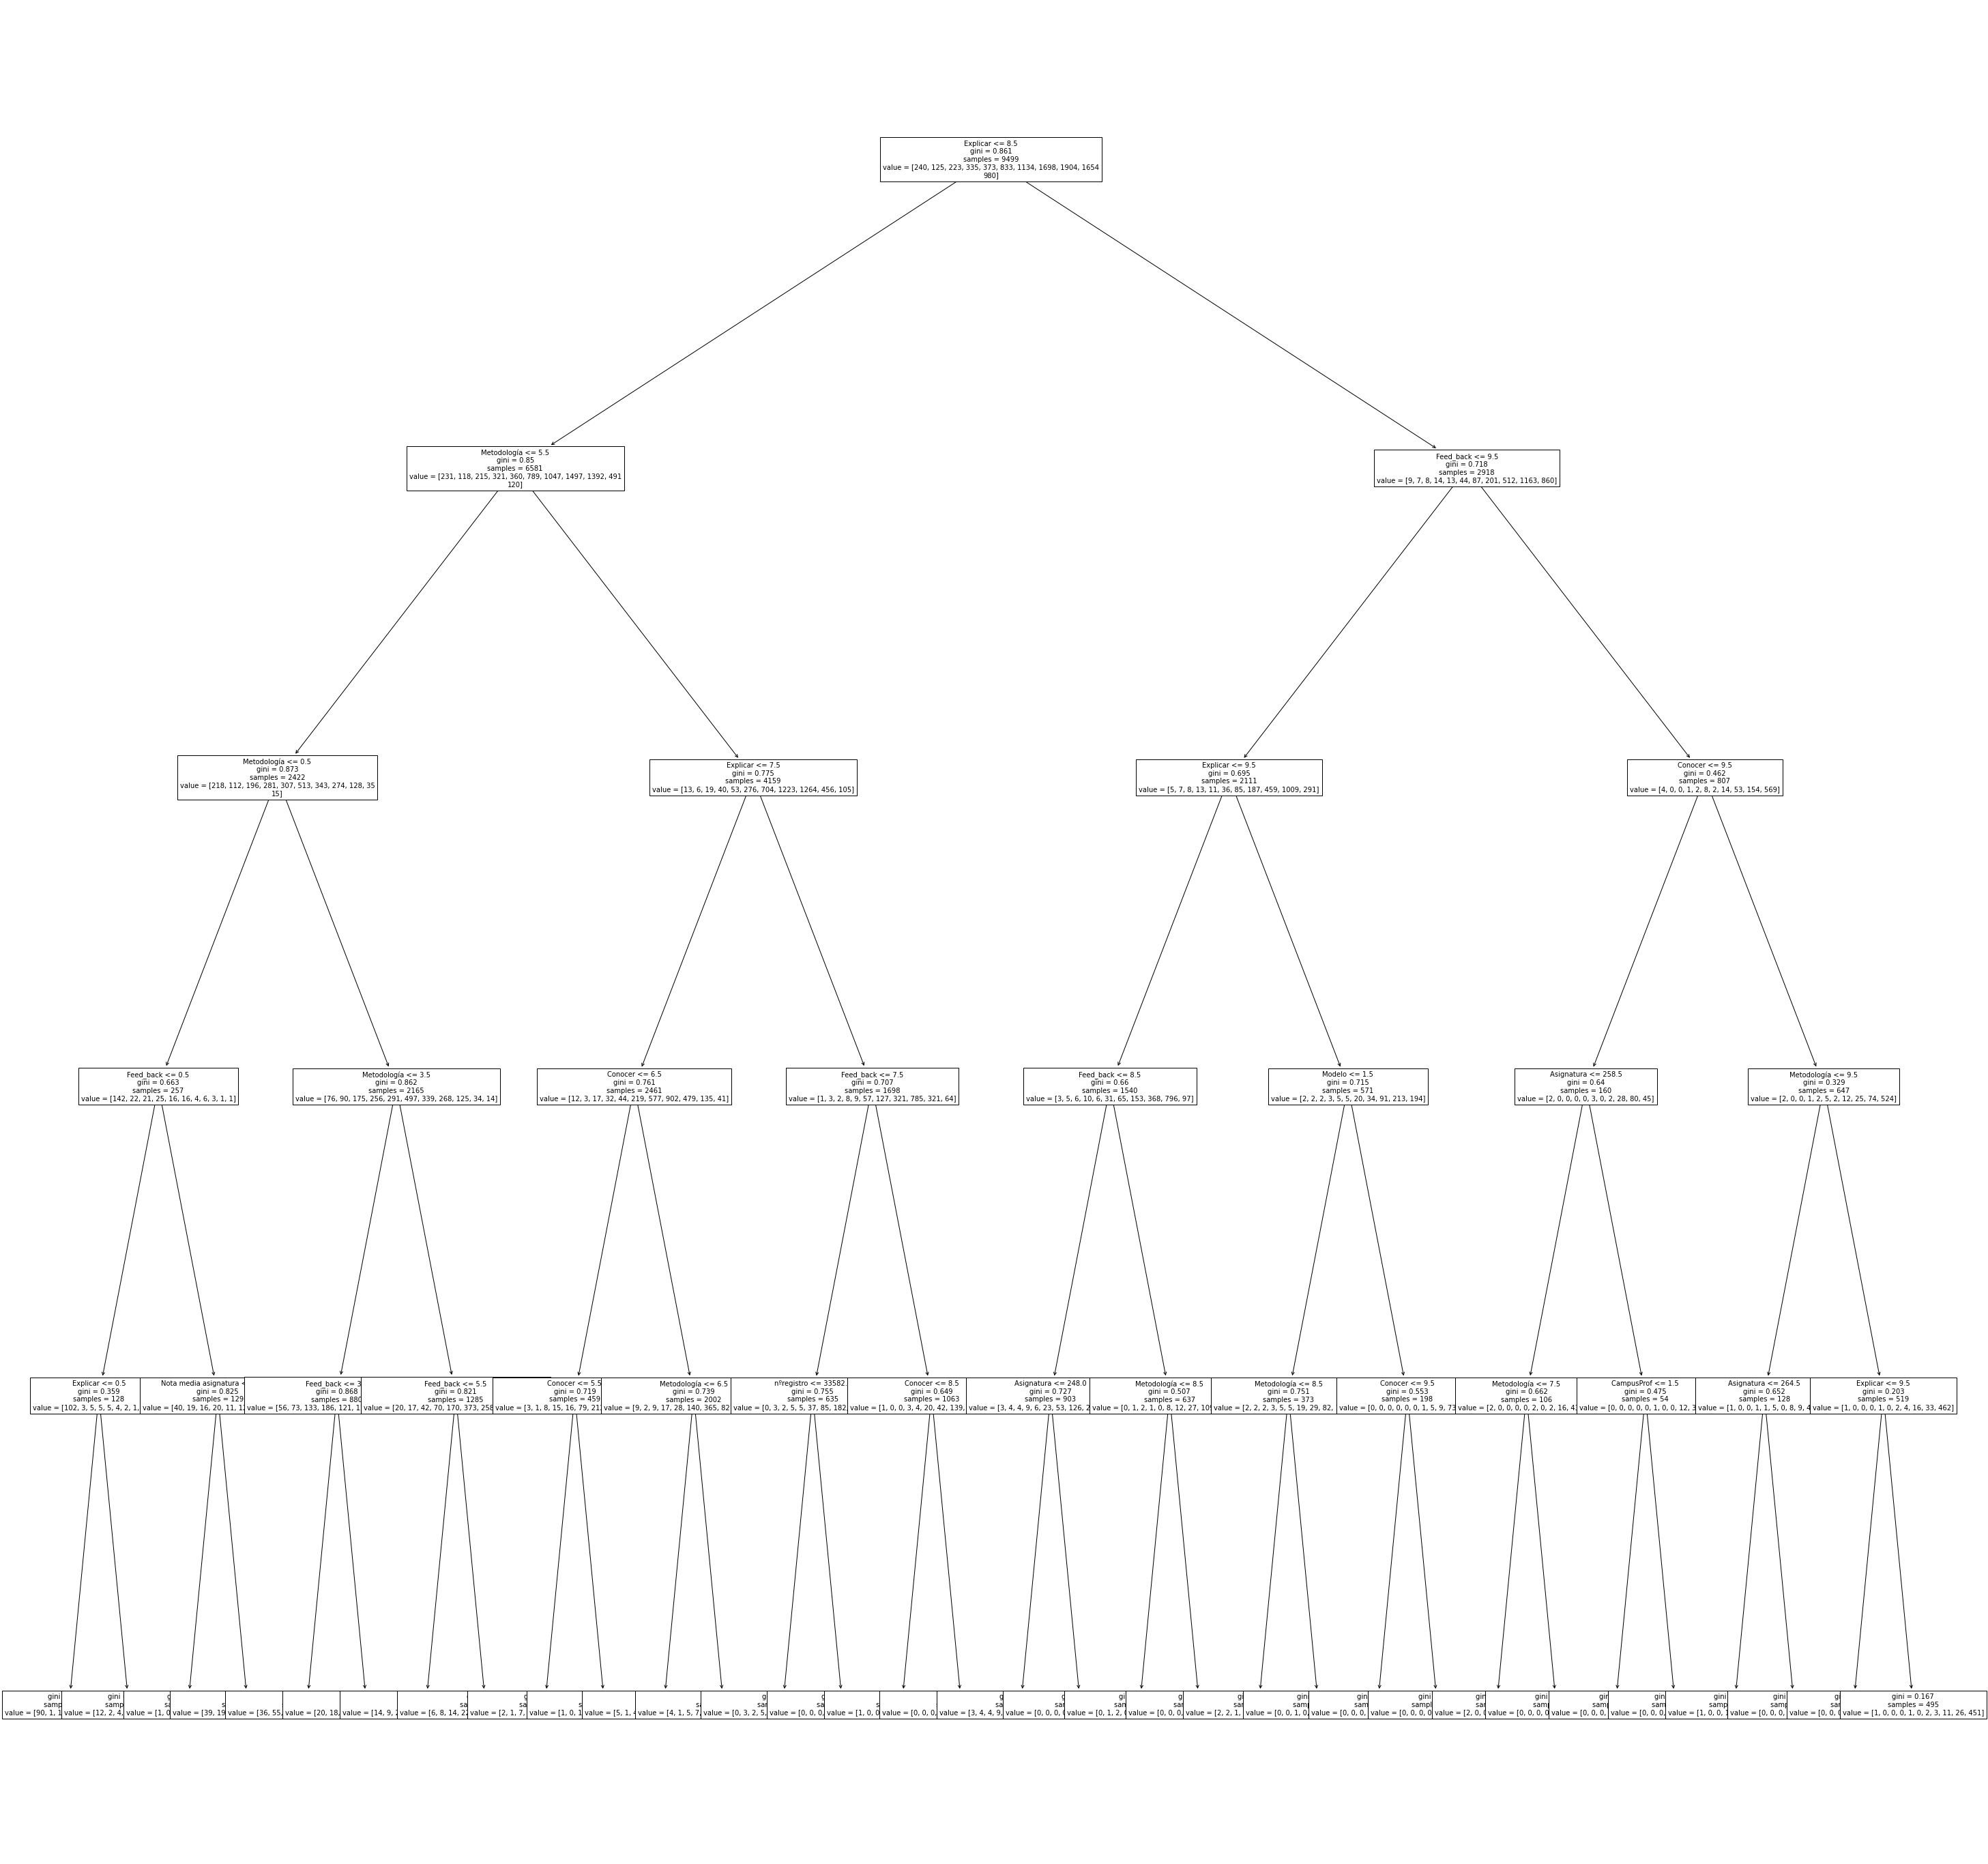

In [80]:
tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=data_train.columns)

plt.figure(figsize=(50,50))
tree.plot_tree(dt2,feature_names=data_train.columns,fontsize=10)


*   Explicar <8; Metodología <0 y feedback <0 = Todos detractores
*   Explicar <7, metodología <5, conocer <5= 90% detractores
*   Explicar >9, feedback <9 = Mitad-Mitad detractor/neutro
*   Explicar > 9 , feedback<9, modelo 1= Bastantes neutros, Si el modelo es 2, casi todo promotor


*   Explicar>9, feedback >10, conocer < 10, Bastantes neutros
*   Explicar>9, feedback >10, conocer > 10, modelo 1, Mayoría promotor y Modelo 2 casi 100% promotor


*   Y obviamente: explicar >10, feedback>10, conocer >10, metodología>10, todos promotores










DT NOTAS

In [81]:
notas_dfv4 = dfv3.drop(['Nota_discreta','Nota media asignatura','categoricalNota','ConocerCat','ExplicarCat','MetodologiaCat','Feed_backCat','categorical'],1)
label2 = dfv3.loc[:,['Nota_discreta']]
data_train, data_test, label_train, label_test = train_test_split(notas_dfv4, label2, test_size = 0.2, random_state = 50)

In [82]:
# Definir un clasificador
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Entrenar el clasificador con el dataset de train
dt2.fit(data_train, label_train)

# Evaluar en train
dt2_score_train = dt2.score(data_train, label_train)
# Evaluar en test
dt2_score_test = dt2.score(data_test, label_test)



In [83]:
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
dt1_score_test = dt1.score(data_test, label_test)

In [84]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.5357406042741342   0.5427368421052632
max                     1.0   0.9983157894736842


[Text(334.8, 226.5, 'nºEncuesta <= 1677.5\ngini = 0.709\nsamples = 9499\nvalue = [255, 963, 3368, 3533, 1180, 200]'),
 Text(167.4, 135.9, 'curso <= 3.5\ngini = 0.665\nsamples = 5350\nvalue = [255, 909, 2617, 1340, 203, 26]'),
 Text(83.7, 45.29999999999998, 'gini = 0.635\nsamples = 5007\nvalue = [255, 909, 2613, 1199, 31, 0]'),
 Text(251.10000000000002, 45.29999999999998, 'gini = 0.574\nsamples = 343\nvalue = [0, 0, 4, 141, 172, 26]'),
 Text(502.20000000000005, 135.9, 'campus <= 3.5\ngini = 0.63\nsamples = 4149\nvalue = [0, 54, 751, 2193, 977, 174]'),
 Text(418.5, 45.29999999999998, 'gini = 0.591\nsamples = 3416\nvalue = [0, 54, 751, 1953, 626, 32]'),
 Text(585.9, 45.29999999999998, 'gini = 0.626\nsamples = 733\nvalue = [0, 0, 0, 240, 351, 142]')]

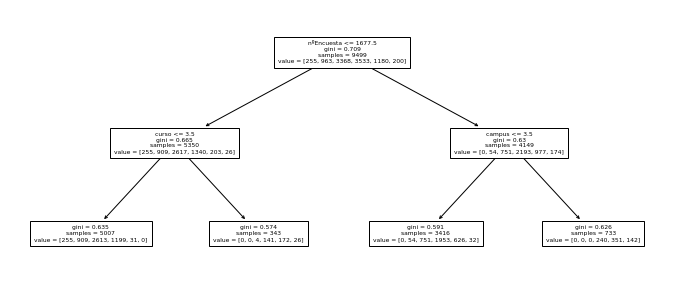

In [85]:
tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=data_train.columns)

plt.figure(figsize=(12,5))
tree.plot_tree(dt2,feature_names=data_train.columns,fontsize=6)




*   nº encuesta <1677, curso < 3 Casi todos aprobado
*   nº encuesta <1677, curso > 3 Casi todos aprobado, empiezan sobresalientes
*   nº encuesta <1677, campus< 3 Todos aprobado, empiezan más sobresalientes
*   nº encuesta <1677, campus> 3 Todos aprobado, empiezan muchos más sobresalientes



*   Total, que con el nuevo modelo y en el campus bilbao, las mejores notas










In [86]:
# Definir un clasificador
dt2 = tree.DecisionTreeClassifier(random_state=800, max_depth=5)

# Entrenar el clasificador con el dataset de train
dt2.fit(data_train, label_train)

# Evaluar en train
dt2_score_train = dt2.score(data_train, label_train)
# Evaluar en test
dt2_score_test = dt2.score(data_test, label_test)

In [87]:
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
dt1_score_test = dt1.score(data_test, label_test)

In [88]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(10, dt2_score_train, dt2_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
10         0.687756605958522   0.6989473684210527
max                     1.0   0.9974736842105263


[Text(1601.0795454545455, 2491.5, 'nºEncuesta <= 1677.5\ngini = 0.709\nsamples = 9499\nvalue = [255, 963, 3368, 3533, 1180, 200]'),
 Text(871.875, 2038.5, 'curso <= 3.5\ngini = 0.665\nsamples = 5350\nvalue = [255, 909, 2617, 1340, 203, 26]'),
 Text(507.27272727272725, 1585.5, 'nºregistro <= 23239.5\ngini = 0.635\nsamples = 5007\nvalue = [255, 909, 2613, 1199, 31, 0]'),
 Text(253.63636363636363, 1132.5, 'Créditos <= 7.0\ngini = 0.689\nsamples = 1941\nvalue = [255, 557, 856, 249, 24, 0]'),
 Text(126.81818181818181, 679.5, 'nºEncuesta <= 1005.5\ngini = 0.64\nsamples = 1549\nvalue = [115, 341, 820, 249, 24, 0]'),
 Text(63.40909090909091, 226.5, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 0, 46, 0, 0]'),
 Text(190.22727272727272, 226.5, 'gini = 0.627\nsamples = 1503\nvalue = [115, 341, 820, 203, 24, 0]'),
 Text(380.45454545454544, 679.5, 'Profesor <= 123.0\ngini = 0.56\nsamples = 392\nvalue = [140, 216, 36, 0, 0, 0]'),
 Text(317.0454545454545, 226.5, 'gini = 0.294\nsamples = 263\nvalue = [47,

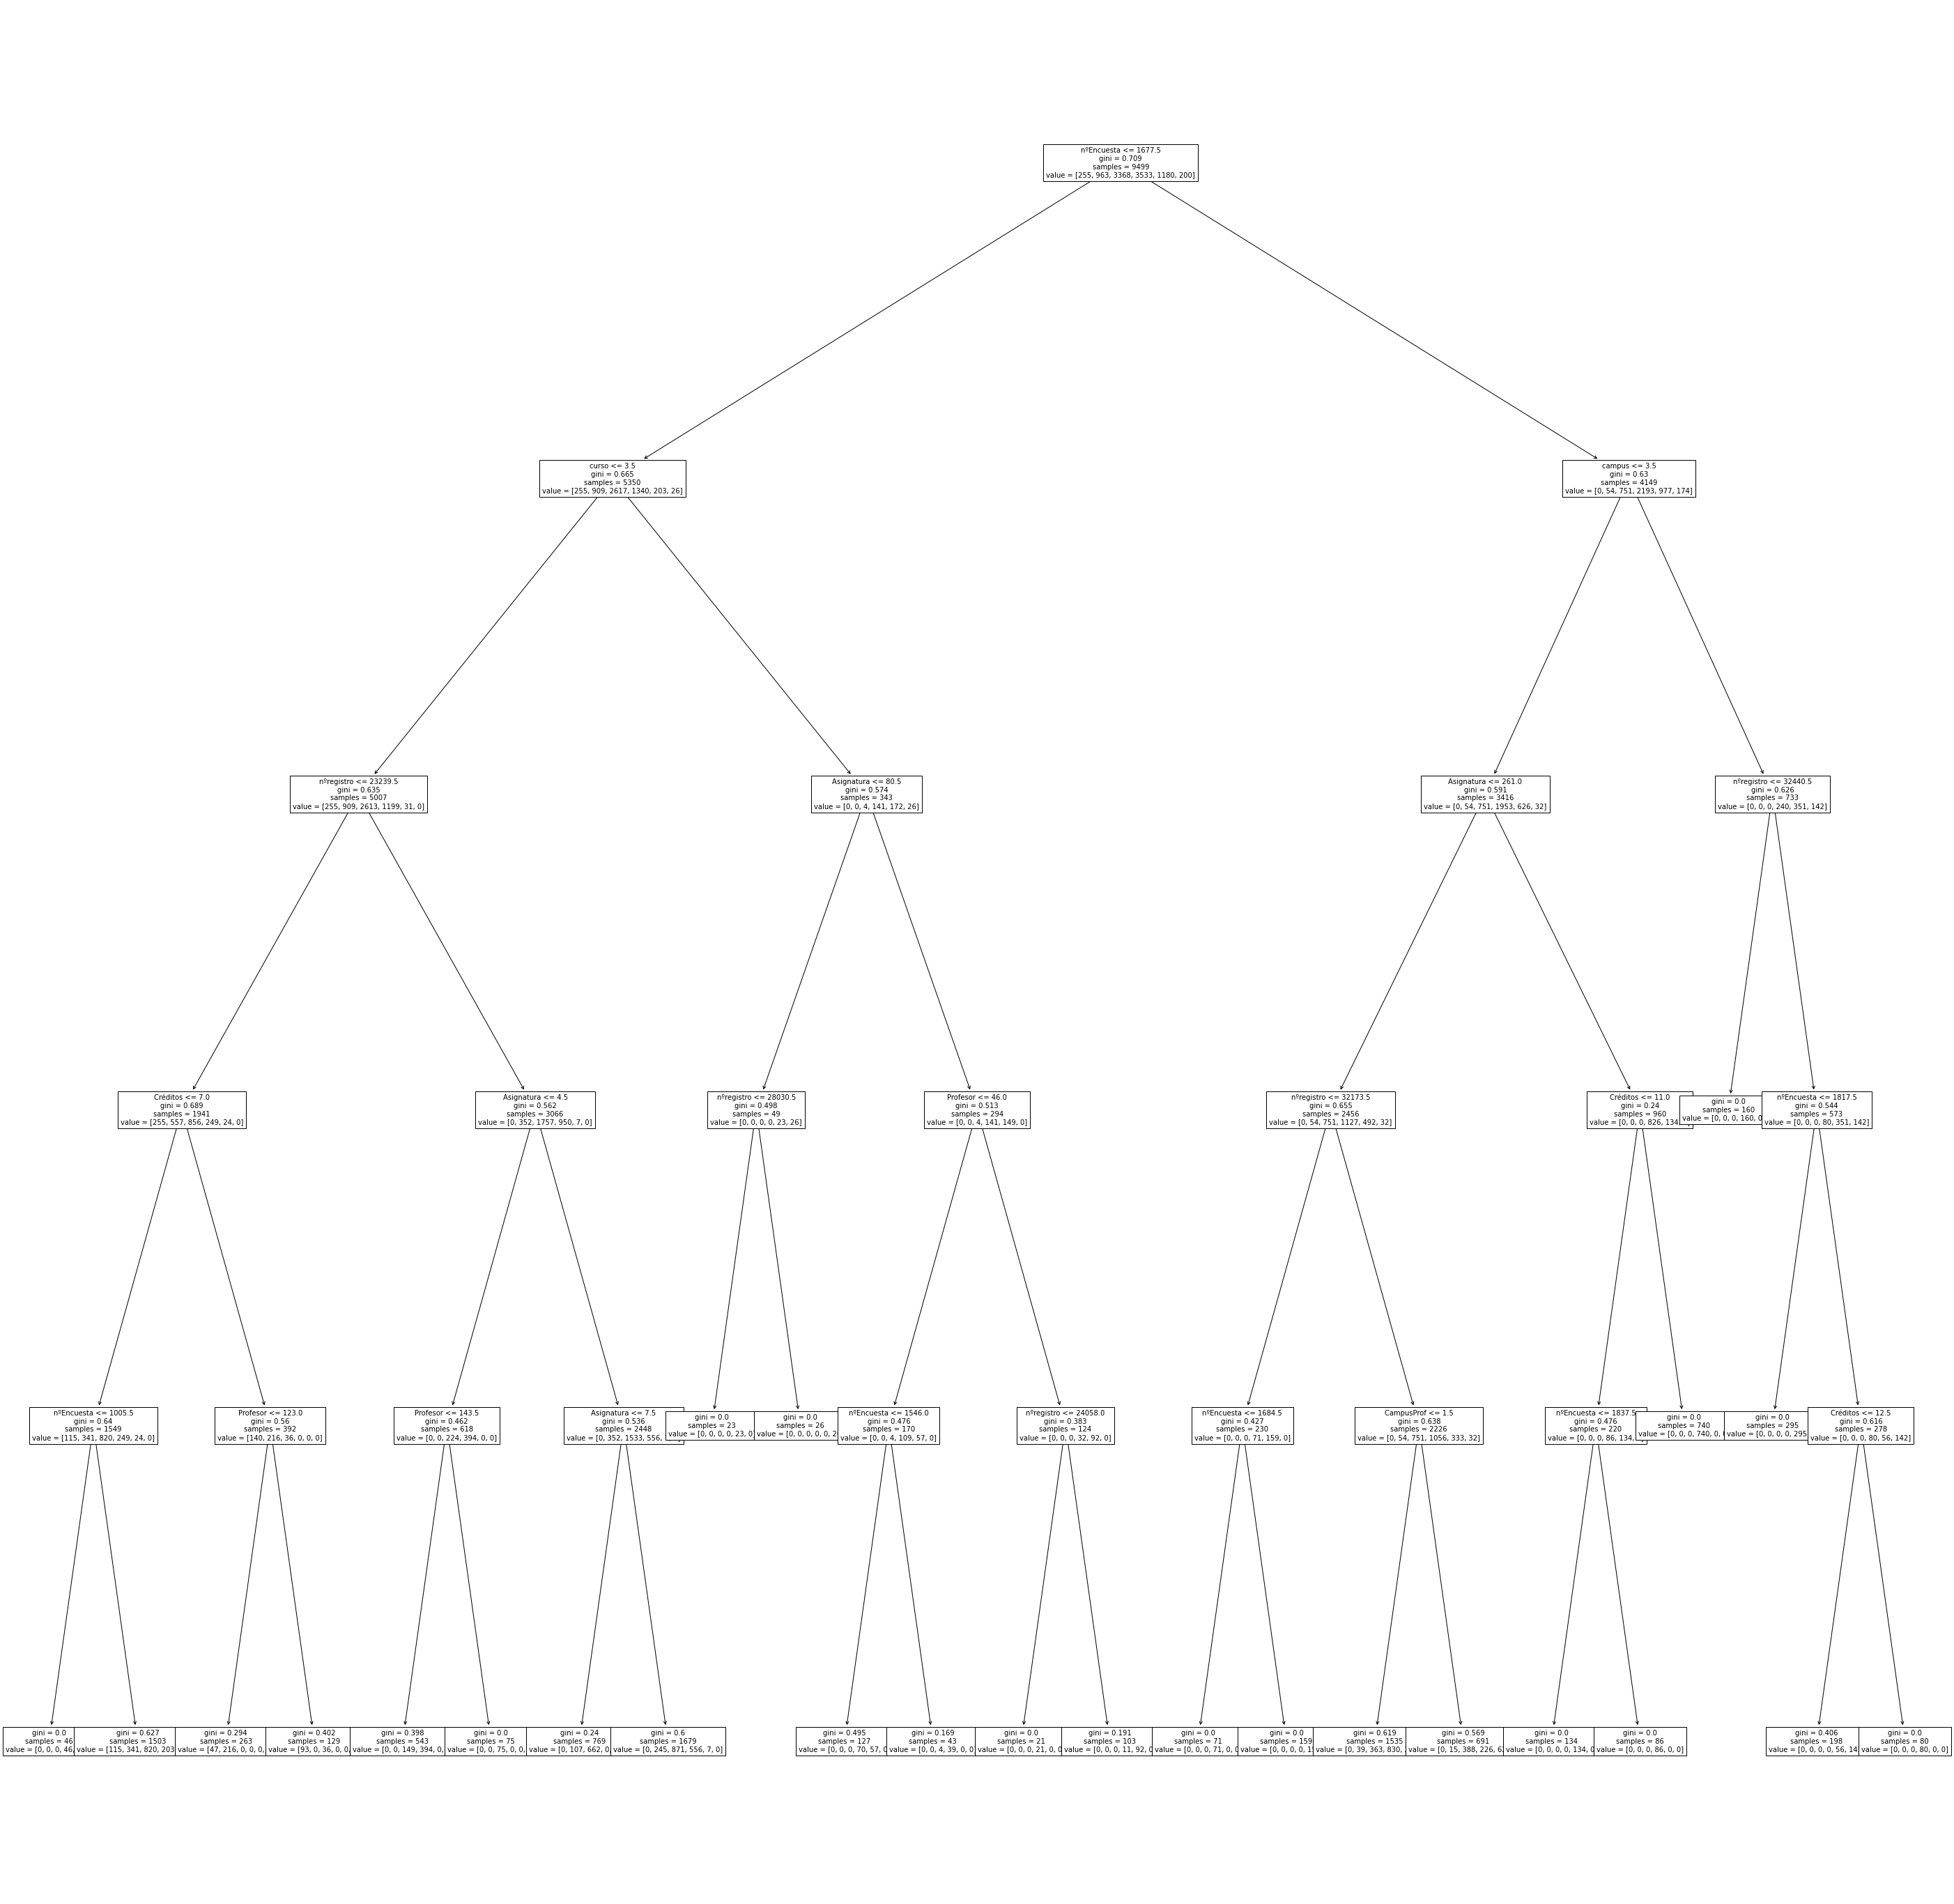

In [89]:
tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=data_train.columns)

plt.figure(figsize=(50,50))
tree.plot_tree(dt2,feature_names=data_train.columns,fontsize=10)

Clustering

In [90]:
cluster = dfv3[['General','Nota_discreta']]


In [91]:
dfv6= dfv3[['Año_Estudio','Edicion','Modelo','SexoProf','EdadProf','Conocer','Explicar','Metodología','Feed_back','General','Nota_discreta','ÁreaConocimientoAsignatura']]

In [92]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(dfv6)


Text(0.5, 1.0, 'Regla del codo: elección número clústers')

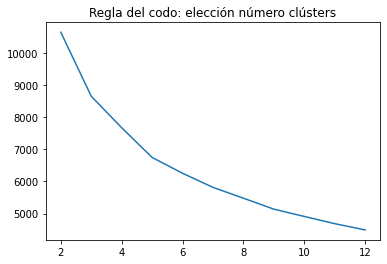

In [93]:
scores = []
k_values = range(2,13)
for a in k_values:
    kmeans = KMeans(n_clusters=a, random_state=0).fit(scaled_df)
    scores.append(kmeans.inertia_)
    
p = sns.lineplot(x=k_values, y=scores)
p.set_title ("Regla del codo: elección número clústers")

[[6.36116741 5.90028375]
 [8.77094753 5.6816758 ]
 [0.97278912 6.35646259]
 [7.44810941 7.33346742]
 [9.35437666 7.47214854]
 [4.27990841 6.53692044]]


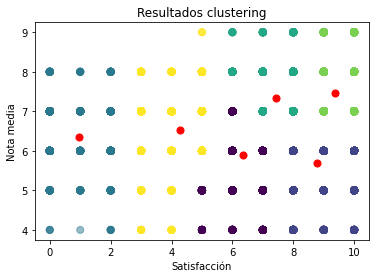

In [94]:
kmeans = KMeans(n_clusters=6).fit(cluster)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(cluster['General'], cluster['Nota_discreta'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title("Resultados clustering")
plt.xlabel("Satisfacción")
plt.ylabel("Nota media")
plt.show()

In [95]:
#Cuidado, si se ejecuta esto, luego no va asociación

In [96]:
#Categorizar notas
bins = pd.IntervalIndex.from_tuples([(0, 5), (5, 8), (8, 11)], closed = 'left')
x = pd.cut(dfv3["Nota media asignatura"].to_list(), bins)
x.categories = [0, 1, 2]
dfv3["categoricalNota"] = x

In [97]:
bins = pd.IntervalIndex.from_tuples([(0, 7), (7, 9), (9, 11)], closed = 'left')
x = pd.cut(dfv3["General"].to_list(), bins)
x.categories = [0, 1,2]
dfv3["categorical"] = x

In [98]:
cluster = dfv3[['categorical','categoricalNota']]


In [99]:
dfv3['kmean']=kmeans.labels_


In [100]:
dfv6= dfv3[['Año_Estudio','Edicion','Modelo','SexoProf','EdadProf','Conocer','Explicar','Metodología','Feed_back','General','Nota_discreta','ÁreaConocimientoAsignatura']]

In [101]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(dfv6)
scaled_df = pd.DataFrame(scaled_df, columns=['Año_Estudio','Edicion','Modelo','SexoProf','EdadProf','Conocer','Explicar','Metodología','Feed_back','General','Nota_discreta','ÁreaConocimientoAsignatura'])
print(scaled_df)


       Año_Estudio  Edicion  ...  Nota_discreta  ÁreaConocimientoAsignatura
0              0.0      0.0  ...            0.6                    0.166667
1              0.0      0.0  ...            0.6                    0.166667
2              0.0      0.0  ...            0.6                    0.166667
3              0.0      0.0  ...            0.6                    0.166667
4              0.0      0.0  ...            0.6                    0.166667
...            ...      ...  ...            ...                         ...
11869          0.8      0.8  ...            0.8                    0.000000
11870          0.8      0.8  ...            0.8                    0.000000
11871          0.8      0.8  ...            0.8                    0.000000
11872          0.8      0.8  ...            0.8                    0.000000
11873          0.8      0.8  ...            0.8                    0.000000

[11874 rows x 12 columns]


In [102]:
pca = PCA()
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [103]:
pca.explained_variance_ratio_

array([0.32170579, 0.20234955, 0.14741581, 0.10750212, 0.10069989,
       0.05107299, 0.02088056, 0.01571673, 0.01262936, 0.01139158,
       0.00787834, 0.00075728])

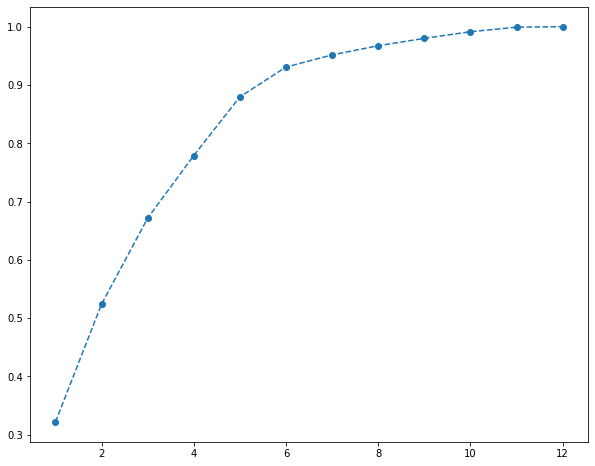

In [104]:
plt.figure(figsize= (10,8))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker = 'o' , linestyle = '--')


ASOCIATION RULES

In [105]:
df_cat = dfv3[['ConocerCat','ExplicarCat','MetodologiaCat','Feed_backCat','categorical']]
df_cat_notas = dfv3[['categoricalNota','ConocerCat','ExplicarCat','MetodologiaCat','Feed_backCat','categorical']]

In [106]:
transactions = []

for i in range(0,df_cat_notas.shape[0]):
	transactions.append([str(df_cat_notas.values[i,j]) for j in range(0,6)])

In [107]:
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 0.5, min_length = 2)

results = list(rules)

In [108]:
def inspect(results):
    rh          = [tuple(result[2][0][0]) for result in results]
    lh          = [tuple(result[2][0][1]) for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(rh, lh, supports, confidences, lifts))

In [109]:
resultDataFrame=pd.DataFrame(inspect(results),
                columns=['X','Y','support','confidence','lift'])

In [110]:
resultDataFrame.sort_values(by='lift',ascending= True)

,X,Y,support,confidence,lift
16,"(Detractor,)","(Promotor,)",0.097103,0.422344,0.548978
30,"(Detractor,)","(1, Promotor)",0.093987,0.408791,0.569984
21,"(2, 0)","(Passive,)",0.006316,0.378788,0.586558
43,"(2,)","(1, Passive, Promotor)",0.078154,0.257635,0.589205
39,"(2, 0)","(Passive, Promotor)",0.004548,0.272727,0.602823
20,"(0,)","(1, Promotor)",0.171130,0.458277,0.638983
34,"(2,)","(Passive, Promotor)",0.088344,0.291227,0.643714
9,"(0,)","(Promotor,)",0.191595,0.513081,0.666921
35,"(Detractor,)","(Passive, Promotor)",0.073185,0.318315,0.703588
44,"(Detractor,)","(1, Passive, Promotor)",0.070911,0.308425,0.705362


# NLP
Por motivos legales no podemos adjuntar los comentarios de los alumnos, mirar la sección de NLP en github para ver los resultados.

In [112]:
df_NLP1= dfv3[['categorical','Nota media asignatura','Mantener1','Mantener2','Mantener3','Mejorar1','Mejorar2','Mejorar3']]

In [ ]:
df_NLP2= dfv3[['categoricalNota','Mantener1','Mantener2','Mantener3','Mejorar1','Mejorar2','Mejorar3']]

In [ ]:
nltk.download('punkt')

In [ ]:
df_NLP1['categorical'] = df_NLP1['categorical'].map({'Passive': 2, 'Detractor': 1, 'Promotor' : 3})


In [ ]:
subset1_dfNLP = df_NLP1[df_NLP1["categorical"] == 1]


In [ ]:
subset2_dfNLP2 = df_NLP1[df_NLP1["categorical"] == 2]


In [ ]:
subset3_dfNLP1 = df_NLP1[df_NLP1["categorical"] == 3]


In [ ]:
subset1_dfNLP['Mantener1'].value_counts()

In [ ]:
subset2_dfNLP2['Mantener1'].value_counts()

In [ ]:
subset3_dfNLP1['Mantener1'].value_counts()

In [ ]:
subset1_dfNLP['Mejorar1'].value_counts()

In [ ]:
subset2_dfNLP2['Mejorar1'].value_counts()

In [ ]:
subset3_dfNLP1['Mejorar1'].value_counts()

In [ ]:
df_NLP2['categoricalNota'] = df_NLP2['categoricalNota'].map({'Suspenso': 0, 'Aprobado': 1, 'Sobresaliente' : 2})


In [ ]:
subset0_dfNLP2 = df_NLP2[df_NLP2["categoricalNota"] == 0]


In [ ]:
subset1_dfNLP2 = df_NLP2[df_NLP2["categoricalNota"] == 1]


In [ ]:
subset2_dfNLP2 = df_NLP2[df_NLP2["categoricalNota"] == 2]


In [ ]:
subset0_dfNLP2['Mantener1'].value_counts()

In [ ]:
subset1_dfNLP2['Mantener1'].value_counts()

In [ ]:
subset2_dfNLP2['Mantener1'].value_counts()

In [ ]:
subset0_dfNLP2['Mejorar1'].value_counts()

In [ ]:
subset1_dfNLP2['Mejorar1'].value_counts()

In [ ]:
subset2_dfNLP2['Mejorar1'].value_counts()